In [1]:
%run 'HelperFunctions.ipynb'
%run 'Data Preprocessing.ipynb'

<h1>1 Prediction on real data</h1>

In [12]:
T = df_energy_3['Current A average [A]']
Y = df_env_3['CO2']
X = df_energy_3.drop('Current A average [A]', axis=1)

est_class = LinearDML
est_kwargs = {
    'model_y': RandomForestRegressor(),
    'model_t': RandomForestRegressor()
}

model = train_model(Y, T, X, est_class, est_kwargs, verbose=True)

Mean Absolute Error on Test Set: 12.27


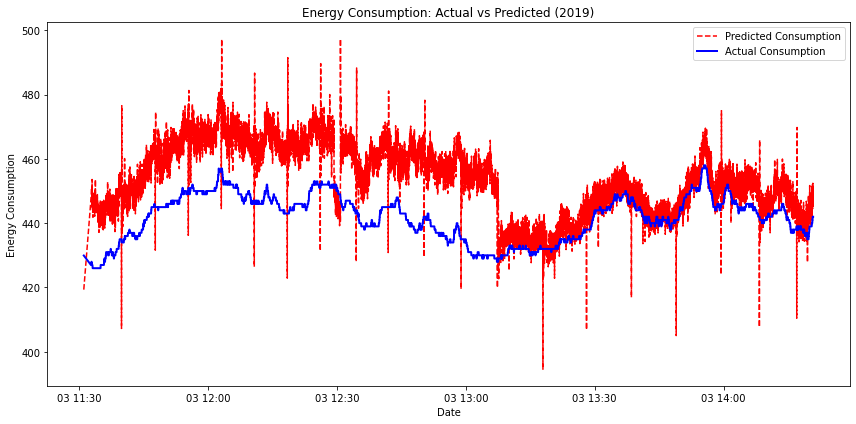

In [24]:
# Predict the causal effect for the test set
causal_effects = model.effect(X)

# Adjust the features for computing residuals
X_train_combined = pd.concat([T, X], axis=1)

# Predict the outcome based on the causal effect
predicted_consumption = Y - np.mean(model.residuals_[0]) + causal_effects

mae = mean_absolute_error(Y, predicted_consumption)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

test['date'].shape

plt.figure(figsize=(12, 6))
plt.plot(df_energy_3.index, predicted_consumption, label="Predicted Consumption", color='red', linestyle='--')
plt.plot(df_energy_3.index, Y, label="Actual Consumption", color='blue', linewidth=2)
plt.title("Energy Consumption: Actual vs Predicted (2019)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.legend()
plt.tight_layout()
plt.show()

<h1>2 DMLOrthoForest </h1>

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from econml.orf import DMLOrthoForest
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df_energy_3 and df_env_3 are already defined
T = df_energy_3['Current A average [A]']
Y = df_env_3['CO2']
X = df_energy_3.drop('Current A average [A]', axis=1)

In [38]:
est = DMLOrthoForest(
    model_Y=RandomForestRegressor(n_estimators=50, max_depth=5),
    model_T=RandomForestRegressor(n_estimators=50, max_depth=5),
    n_trees=50, # Number of trees in the forest
    min_leaf_size=10,  # Minimum number of samples in a leaf
    max_depth=5,  # Maximum depth of each tree
    subsample_ratio=0.7,  # Fraction of samples used to train each tree
    bootstrap=True,  # Bootstrap samples in each tree
)

In [39]:
ortho_model = est.fit(Y=Y, T=T, X=X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   58.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

Mean Absolute Error on Test Set: 11.41


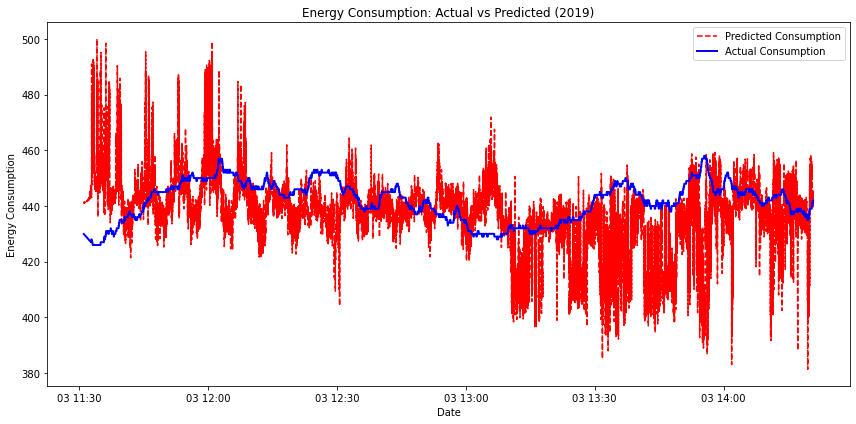

In [40]:
# Predict the causal effect for the test set
causal_effects = ortho_model.effect(X)

# Since DMLOrthoForest might not have the residuals_ attribute like LinearDML,
# we'll skip the residuals adjustment for this example.
predicted_consumption = Y.mean() + causal_effects

mae = mean_absolute_error(Y, predicted_consumption)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(df_energy_3.index, predicted_consumption, label="Predicted Consumption", color='red', linestyle='--')
plt.plot(df_energy_3.index, Y, label="Actual Consumption", color='blue', linewidth=2)
plt.title("Energy Consumption: Actual vs Predicted (2019)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.legend()
plt.tight_layout()
plt.show()